## Data Cleaning Error Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

## Daten laden

In [2]:
cleaning = pd.read_parquet('../../data/cleaning_analysis.parquet')

In [3]:
cleaning['correct_cleaning'] = (cleaning['unknown'] == cleaning['clean']).replace({True: 1, False: 0})

## Daten analysieren

In [4]:
cleaning

,series_id,step,timestamp,anglez,enmo,unknown,clean,correct_cleaning
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217,0,0,1
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215,0,0,1
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216,0,0,1
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213,0,0,1
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215,0,0,1
...,...,...,...,...,...,...,...,...
124822075,fe90110788d2,592375,2017-09-08T00:14:35-0400,-27.277500,0.0204,1,0,0
124822076,fe90110788d2,592376,2017-09-08T00:14:40-0400,-27.032499,0.0233,1,0,0
124822077,fe90110788d2,592377,2017-09-08T00:14:45-0400,-26.841200,0.0202,1,0,0
124822078,fe90110788d2,592378,2017-09-08T00:14:50-0400,-26.723900,0.0199,1,0,0


In [5]:
whole_size = len(cleaning)
cleaned_size = len(cleaning[cleaning.clean == 1])

percentage_cleaned = cleaned_size / whole_size

print(whole_size)
print(cleaned_size)
print(percentage_cleaned * 100, '%')

124822080
27912960
22.362197457372925 %


## Daten visualisieren

In [16]:
participant_series_id = '31011ade7c0a'

participant_cleaning = cleaning[cleaning.series_id == participant_series_id].copy()

<Axes: xlabel='step', ylabel='anglez'>

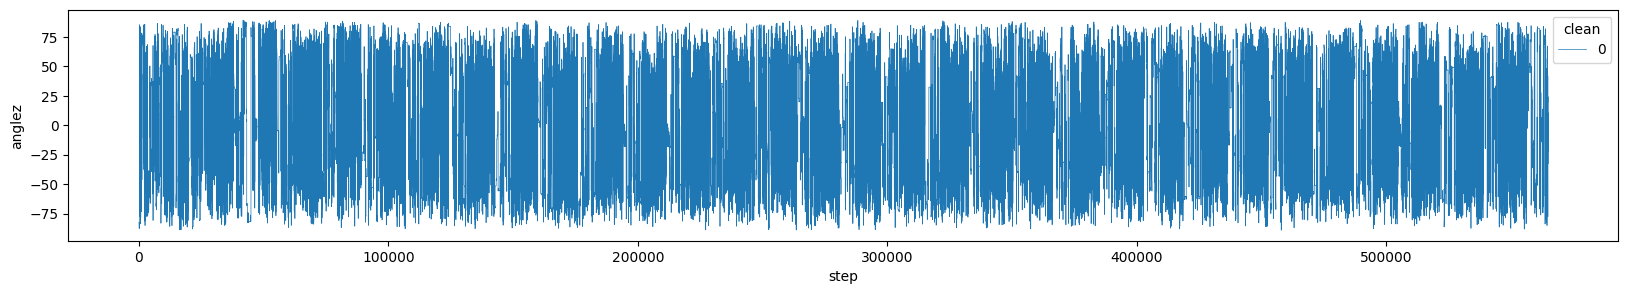

In [17]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.lineplot(data=participant_cleaning, x="step", y="anglez", hue="clean", linewidth = 0.5)

<Axes: xlabel='step', ylabel='anglez'>

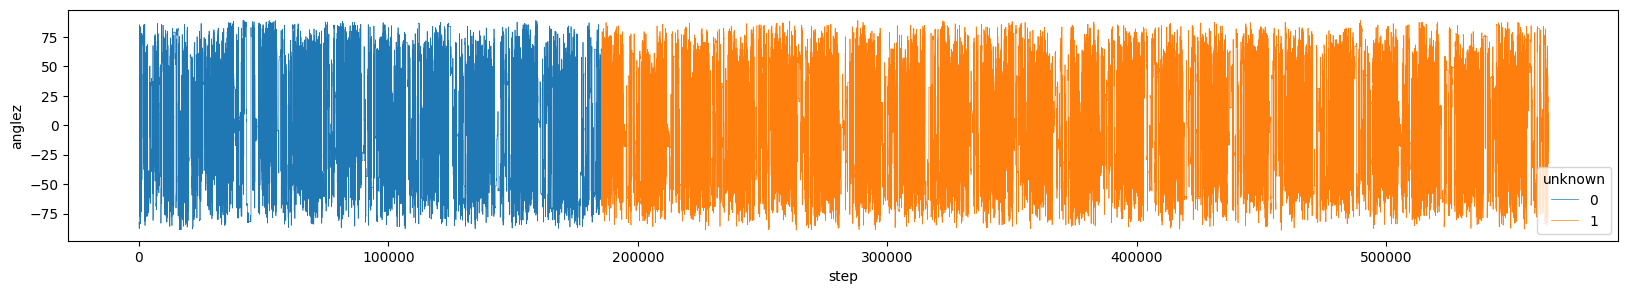

In [18]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.lineplot(data=participant_cleaning, x="step", y="anglez", hue="unknown", linewidth = 0.5)

## Accuracy pro Serie

In [9]:
series = cleaning.series_id.unique()

Text(0.5, 0, 'Series')

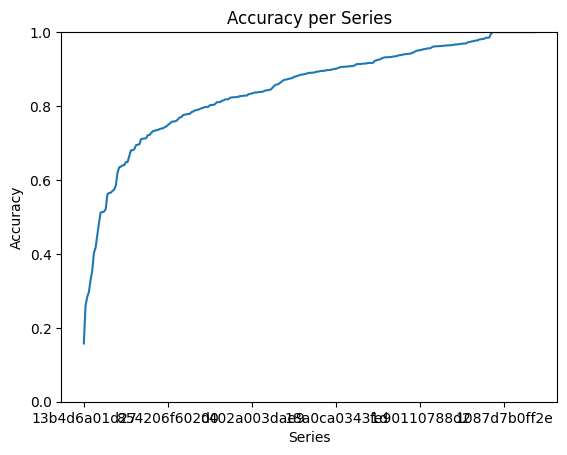

In [10]:
ax = cleaning.groupby('series_id')['correct_cleaning'].mean().sort_values().plot(
    ylim=(0, 1), title='Accuracy per Series'
)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Series")

In [11]:
cleaning.groupby('series_id')['correct_cleaning'].mean().sort_values()

series_id
13b4d6a01d27    0.157640
10469f6765bf    0.258007
05e1944c3818    0.283673
c7d693f24684    0.296660
31011ade7c0a    0.328470
                  ...   
76237b9406d5    1.000000
3452b878e596    1.000000
c68260cc9e8f    1.000000
5acc9d63b5fd    1.000000
b364205aba43    1.000000
Name: correct_cleaning, Length: 269, dtype: float64

## Series with potentialy wrong cleaning

In [12]:
cleaning[(cleaning.clean == 1) & (cleaning.unknown == 0)]

,series_id,step,timestamp,anglez,enmo,unknown,clean,correct_cleaning
7948260,0f572d690310,368460,2018-08-28T19:30:00-0400,7.1384,0.0189,0,1,0
7948261,0f572d690310,368461,2018-08-28T19:30:05-0400,4.6723,0.0195,0,1,0
7948262,0f572d690310,368462,2018-08-28T19:30:10-0400,7.2826,0.0172,0,1,0
7948263,0f572d690310,368463,2018-08-28T19:30:15-0400,6.8904,0.0098,0,1,0
7948264,0f572d690310,368464,2018-08-28T19:30:20-0400,8.7334,0.0135,0,1,0
...,...,...,...,...,...,...,...,...
117842755,f2c2436cf7b7,368635,2018-10-02T20:14:35-0400,-12.3822,0.0992,0,1,0
117842756,f2c2436cf7b7,368636,2018-10-02T20:14:40-0400,-13.3134,0.1016,0,1,0
117842757,f2c2436cf7b7,368637,2018-10-02T20:14:45-0400,-15.9566,0.0542,0,1,0
117842758,f2c2436cf7b7,368638,2018-10-02T20:14:50-0400,-16.2500,0.0374,0,1,0
